In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import sys
import importlib
sys.path.append('../')

import utils
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\USUARIO\\Desktop\\Projects\\4Geeks_temporal_series\\src\\water_spring\\..\\utils.py'>

In [25]:
df = pd.read_csv('../../data/raw/Water_Spring_Amiata.csv')
df = utils.turn_column_into_date(df, 'Date')
df.head()

,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
Date,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.15,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.60,NaN,NaN,NaN,NaN,NaN


# Valores faltantes

In [26]:
utils.get_null_percentage_per_column(df)

Flow_Rate_Bugnano                        73.180179
Flow_Rate_Arbure                         73.180179
Flow_Rate_Ermicciolo                     73.180179
Flow_Rate_Galleria_Alta                  73.180179
Rainfall_Vetta_Amiata                    70.455456
Rainfall_S_Fiora                         64.832376
Rainfall_Laghetto_Verde                  61.733672
Depth_to_Groundwater_David_Lazzaretti    56.698277
Depth_to_Groundwater_S_Fiora_8           52.330707
Temperature_Abbadia_S_Salvatore          52.143716
Rainfall_Abbadia_S_Salvatore             52.103646
Depth_to_Groundwater_S_Fiora_11bis       51.996794
Temperature_Laghetto_Verde               51.863230
Rainfall_Castel_del_Piano                15.974356
Temperature_S_Fiora                       0.000000
dtype: float64

In [27]:
df = utils.remove_columns_with_nulls_percent(df, threshold=50)
df = utils.interpolate_df(df)

Columnas eliminadas por alto porcentaje de valores nulos (50%): ['Rainfall_Abbadia_S_Salvatore', 'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata', 'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis', 'Depth_to_Groundwater_David_Lazzaretti', 'Temperature_Abbadia_S_Salvatore', 'Temperature_Laghetto_Verde', 'Flow_Rate_Bugnano', 'Flow_Rate_Arbure', 'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']
Valores nulos después de la interpolación:
Series([], dtype: int64)


c:\Users\USUARIO\Desktop\Projects\4Geeks_temporal_series\src\water_spring\..\utils.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Relleno hacia adelante
c:\Users\USUARIO\Desktop\Projects\4Geeks_temporal_series\src\water_spring\..\utils.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Relleno hacia atrás


In [28]:
utils.get_null_percentage_per_column(df)

Rainfall_Castel_del_Piano    0.0
Temperature_S_Fiora          0.0
dtype: float64

# Análisis de tendencias

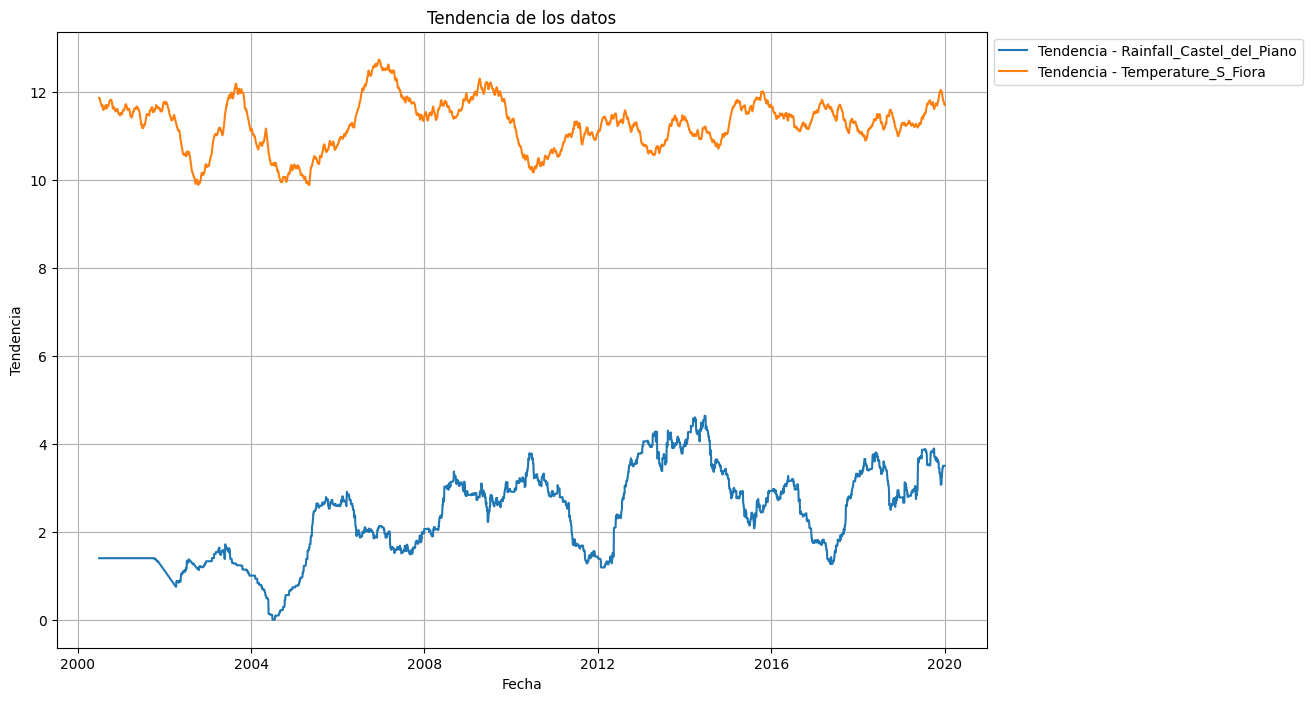

In [29]:
utils.plot_trend(df, period=365)

# Análisis de estacionalidad

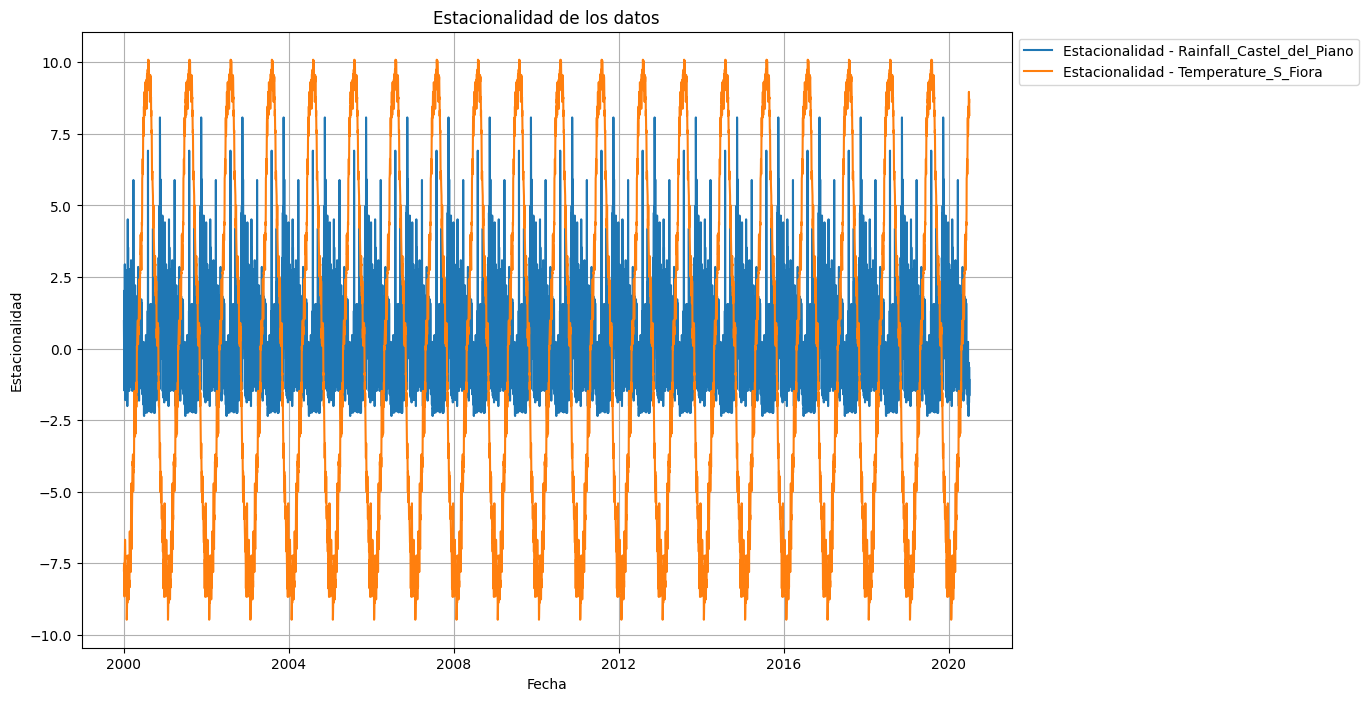

In [30]:
utils.plot_seasonality(df, period=365)

# Prueba de estacionariedad

In [31]:
utils.test_stationarity(df)

Resultados de la prueba de Dickey-Fuller para 'Rainfall_Castel_del_Piano':
Test Statistic                -1.727181e+01
p-value                        5.854503e-30
#Lags Used                     1.500000e+01
Number of Observations Used    7.471000e+03
Critical Value (1%)           -3.431226e+00
Critical Value (5%)           -2.861927e+00
Critical Value (10%)          -2.566976e+00
dtype: float64
--------------------------------------------------------------------------------
Resultados de la prueba de Dickey-Fuller para 'Temperature_S_Fiora':
Test Statistic                   -5.327811
p-value                           0.000005
#Lags Used                       17.000000
Number of Observations Used    7469.000000
Critical Value (1%)              -3.431226
Critical Value (5%)              -2.861927
Critical Value (10%)             -2.566976
dtype: float64
--------------------------------------------------------------------------------


# Análisis de variabilidad

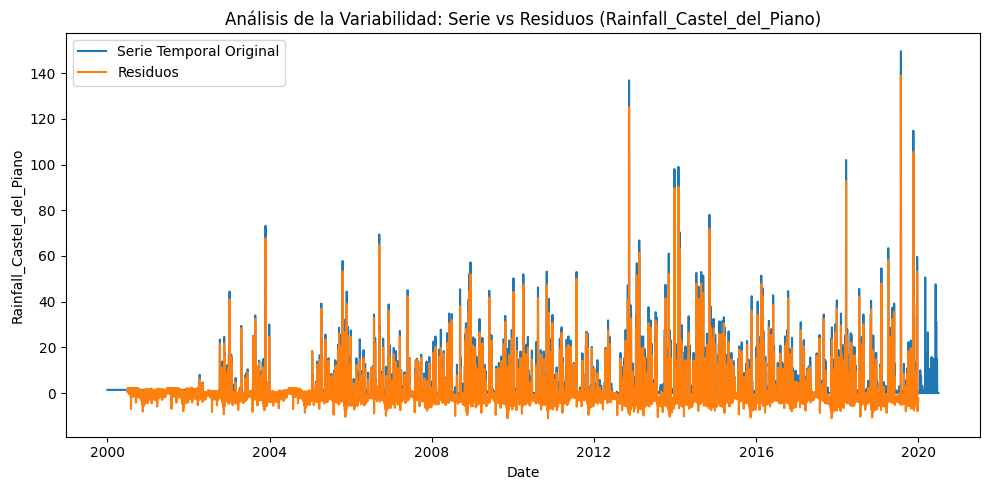

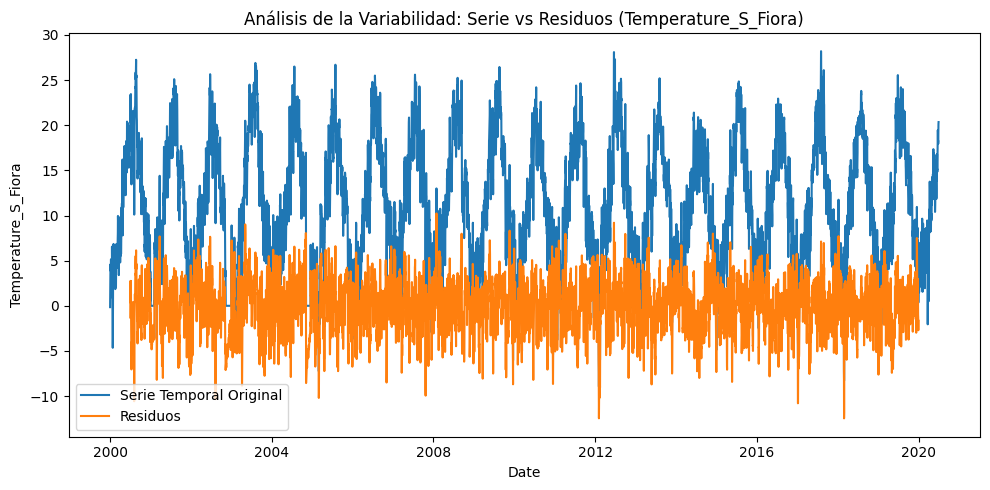

In [32]:
utils.plot_variability(df, period=365)

In [33]:
plt.figure(figsize=(10, 5))
aquifer_auser.isnull().sum().plot(kind='bar', title='Valores faltantes por columna')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de valores nulos')
plt.show()

NameError: name 'aquifer_auser' is not defined

<Figure size 1000x500 with 0 Axes>

# Análisis de autocorrelación

<Figure size 1000x500 with 0 Axes>

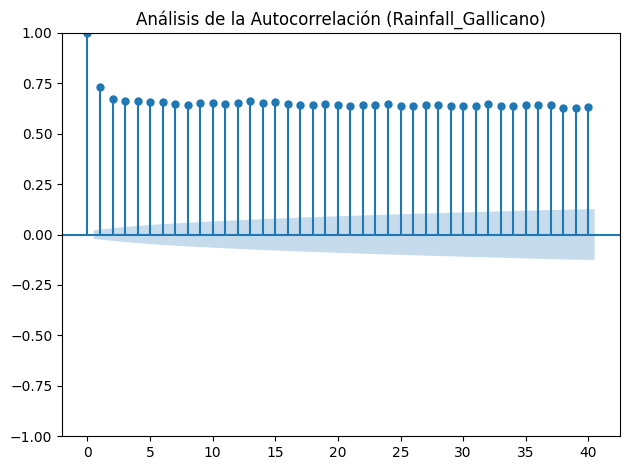

<Figure size 1000x500 with 0 Axes>

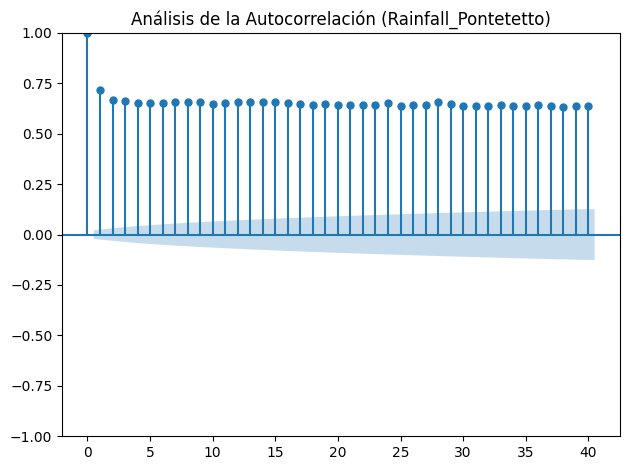

<Figure size 1000x500 with 0 Axes>

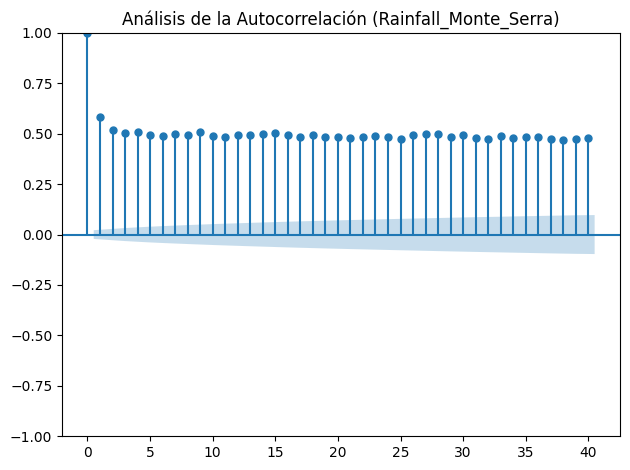

<Figure size 1000x500 with 0 Axes>

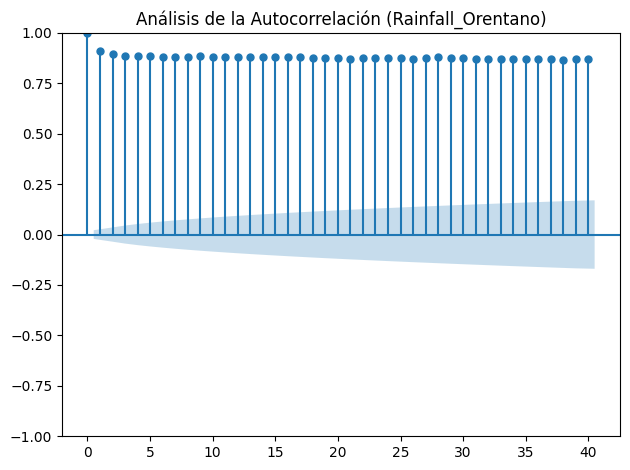

<Figure size 1000x500 with 0 Axes>

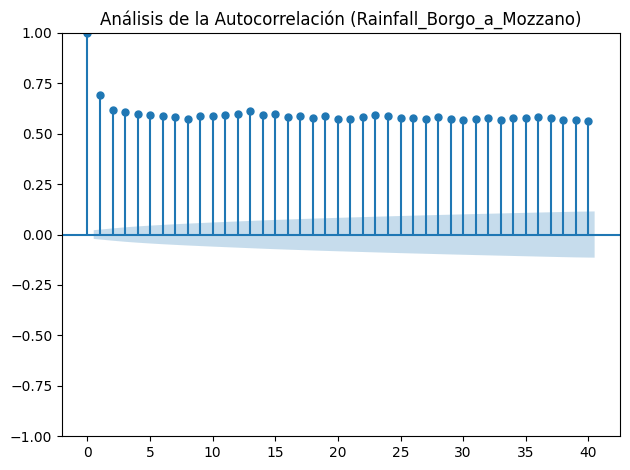

<Figure size 1000x500 with 0 Axes>

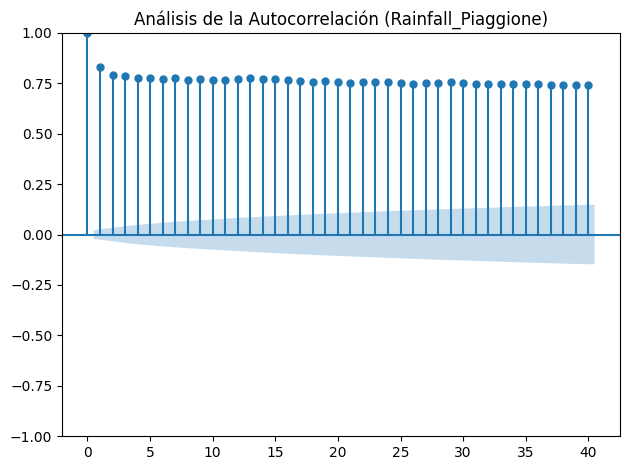

<Figure size 1000x500 with 0 Axes>

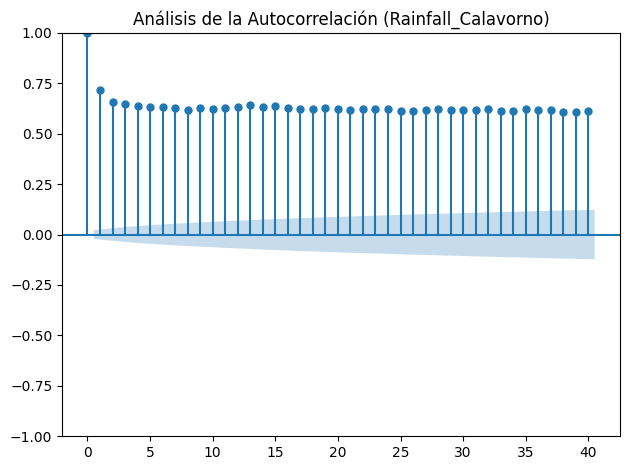

<Figure size 1000x500 with 0 Axes>

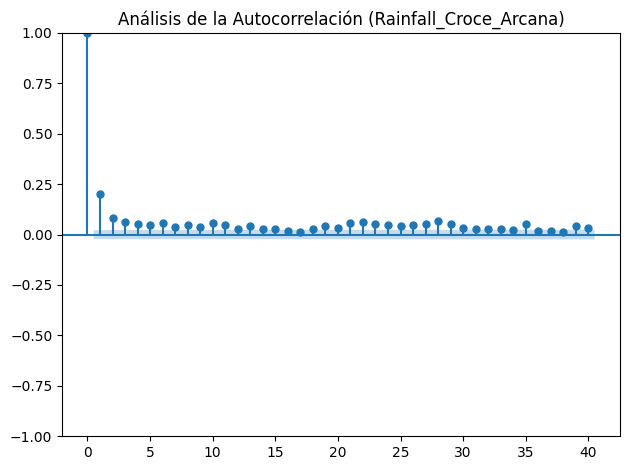

<Figure size 1000x500 with 0 Axes>

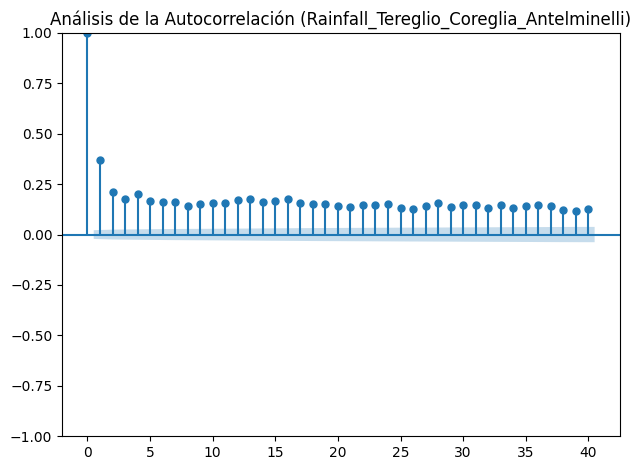

<Figure size 1000x500 with 0 Axes>

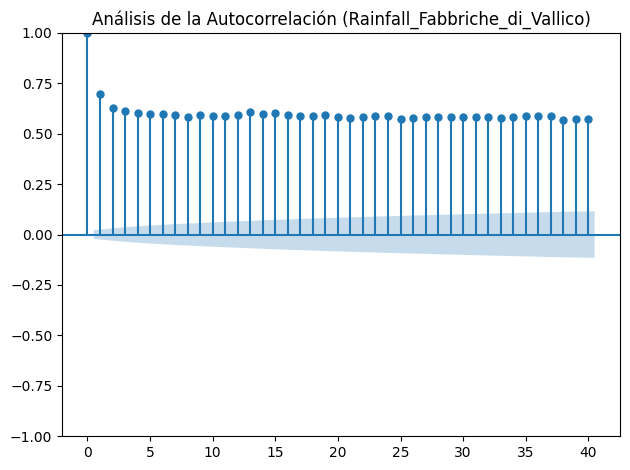

<Figure size 1000x500 with 0 Axes>

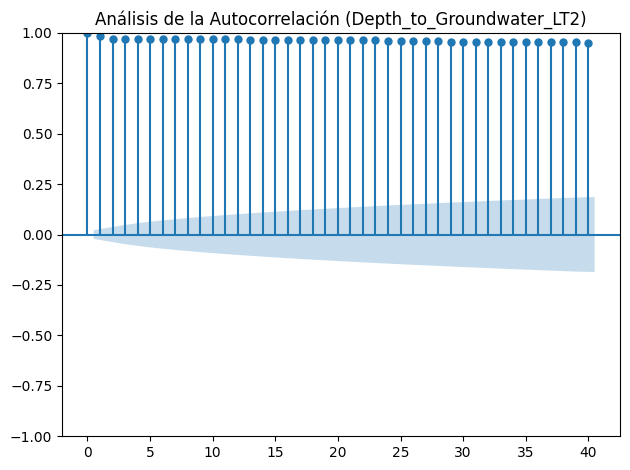

<Figure size 1000x500 with 0 Axes>

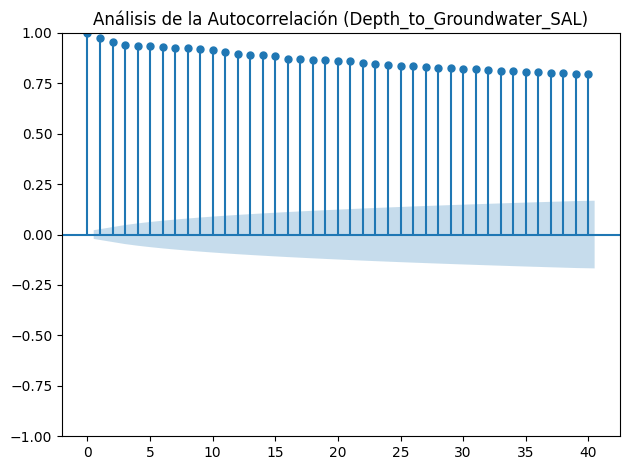

<Figure size 1000x500 with 0 Axes>

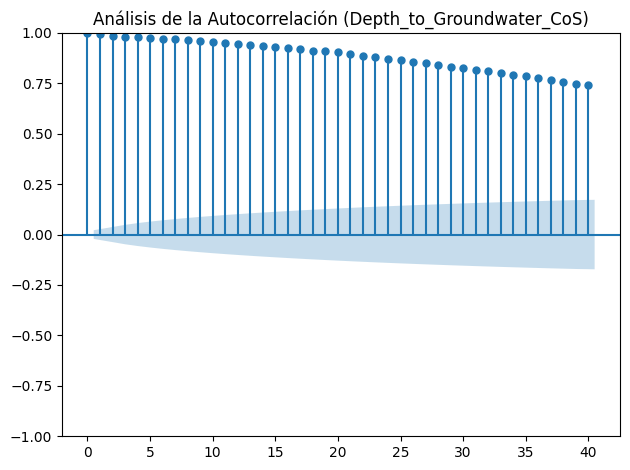

<Figure size 1000x500 with 0 Axes>

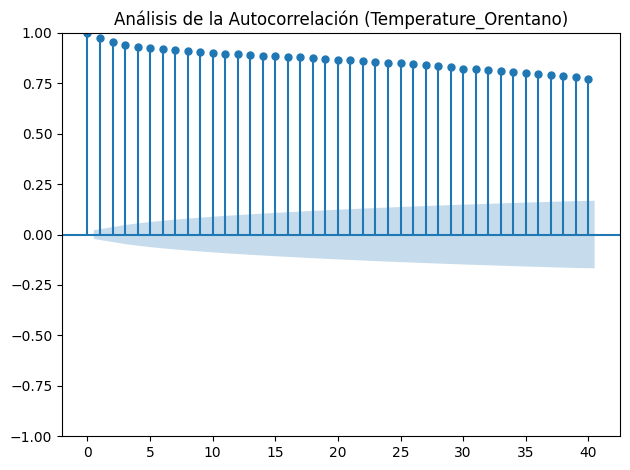

<Figure size 1000x500 with 0 Axes>

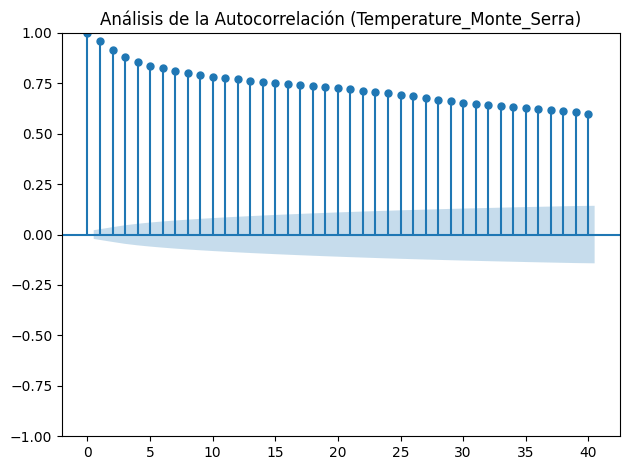

<Figure size 1000x500 with 0 Axes>

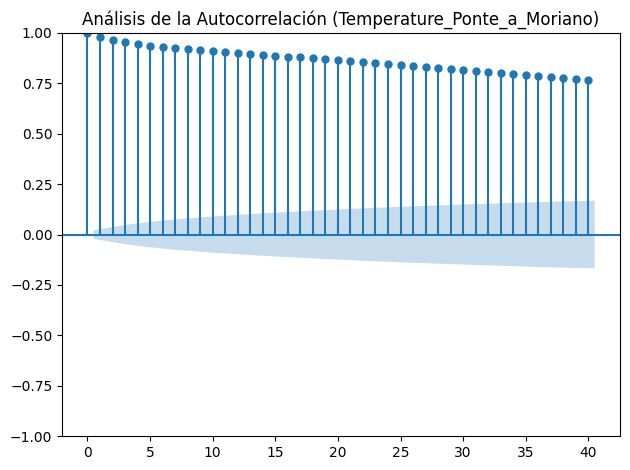

<Figure size 1000x500 with 0 Axes>

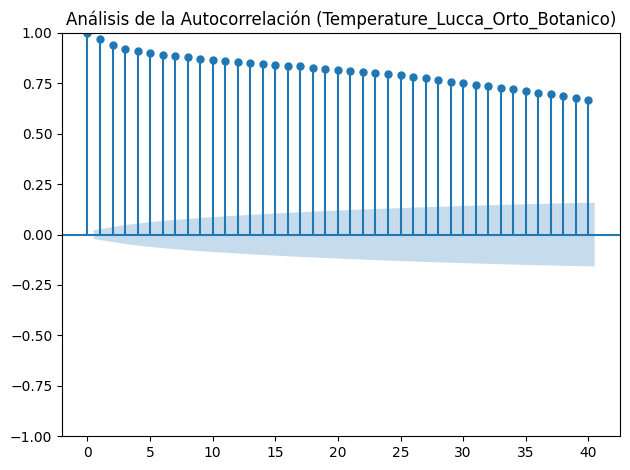

<Figure size 1000x500 with 0 Axes>

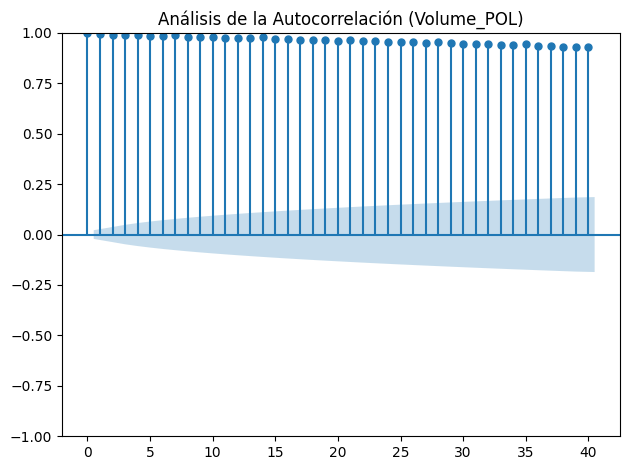

<Figure size 1000x500 with 0 Axes>

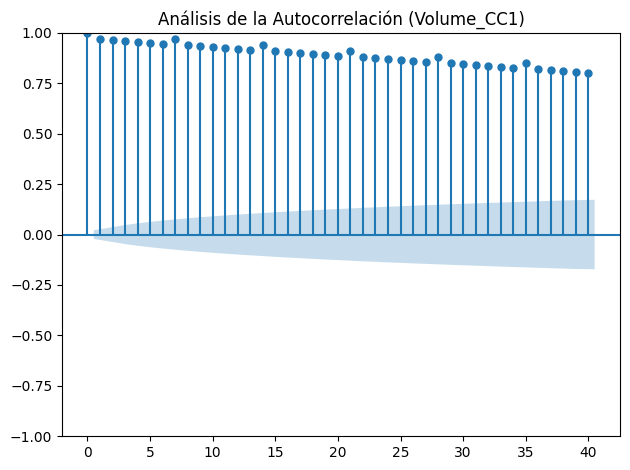

<Figure size 1000x500 with 0 Axes>

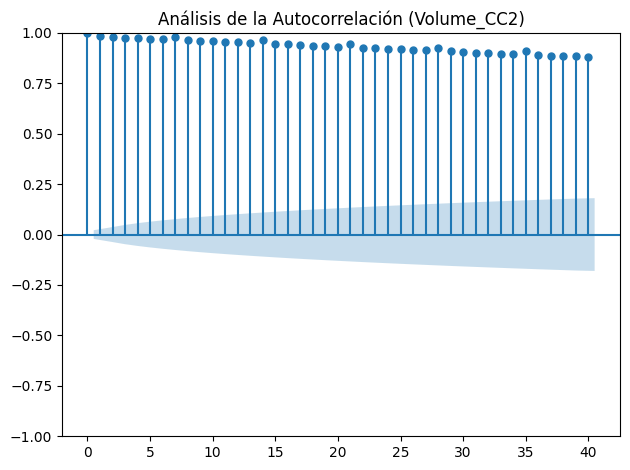

<Figure size 1000x500 with 0 Axes>

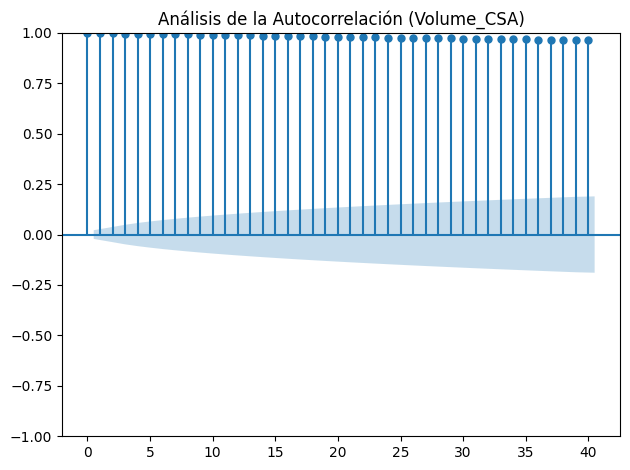

<Figure size 1000x500 with 0 Axes>

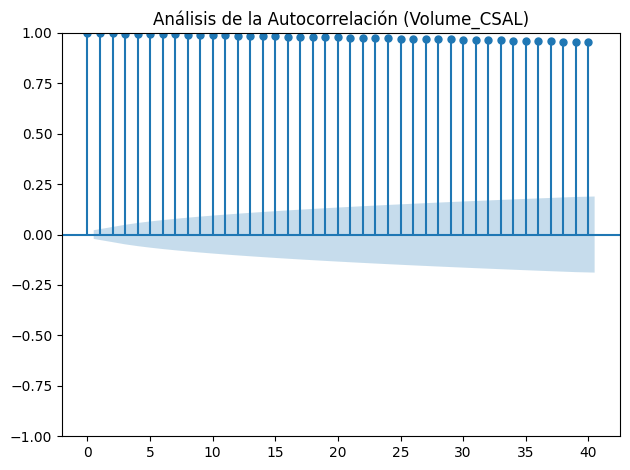

<Figure size 1000x500 with 0 Axes>

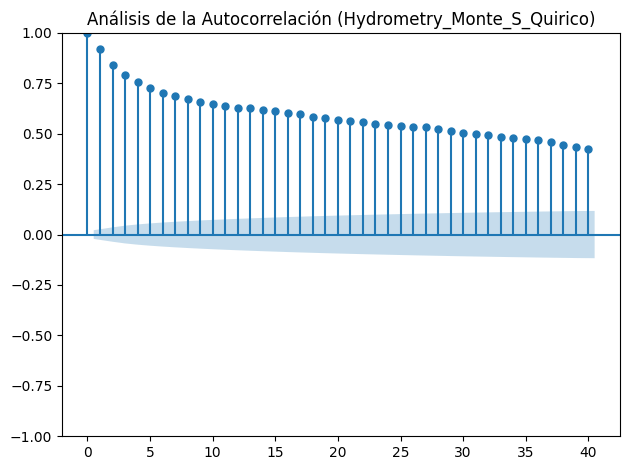

<Figure size 1000x500 with 0 Axes>

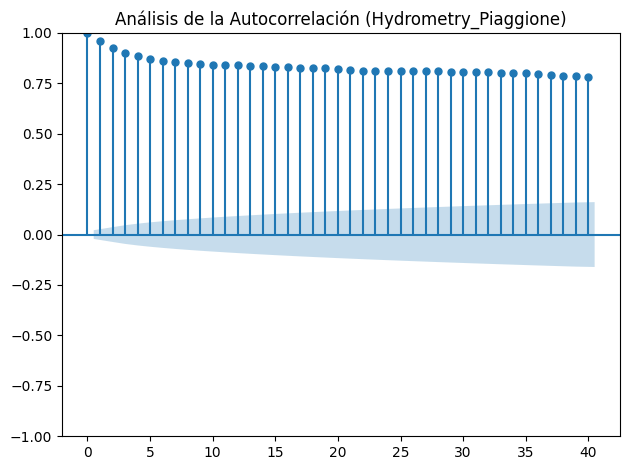

In [ ]:
utils.plot_autocorrelation(df)

In [34]:
df = df.rename(columns={"Rainfall_Castel_del_Piano": "Rainfall"})

In [35]:
df.to_csv("../../data/processed/water_spring_amiata.csv", index=True)